In [42]:
from tensorflow import reshape, expand_dims, reduce_max ,reduce_min, float32
from tensorflow.math import top_k, reduce_sum, exp
from tensorflow.keras.layers import Layer
from tensorflow.keras.backend import repeat_elements
from tensorflow.keras import initializers, regularizers
from tensorflow.image import extract_patches
import numpy as np

class TropReg(regularizers.Regularizer):
    def __init__(self, lam=1.0):
        self.lam = lam

    def __call__(self, weight_matrix):
        values, indices = top_k(weight_matrix, 1)
        print(values)
        values2, indices2 = top_k(-weight_matrix, 1)
        print(values2)
        print(values[:, 0] + values2[:, 0])
        print(reduce_sum(values[:, 0] + values2[:, 0]))
        return self.lam * reduce_sum(values[:, 0] + values2[:, 0])

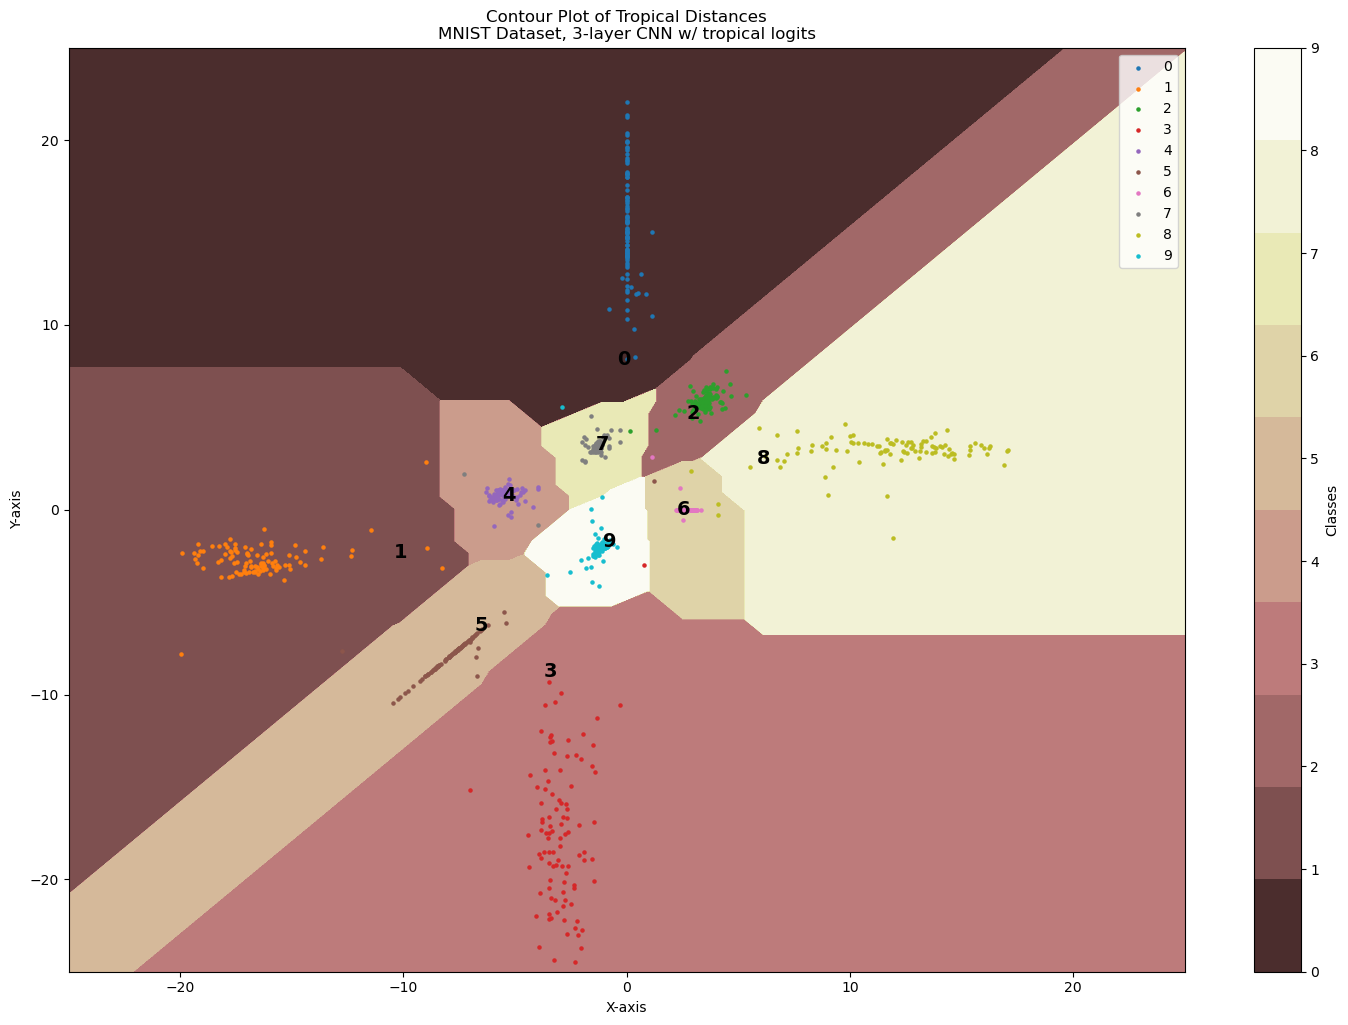

In [46]:
# voronoi diagram plot

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_start = "C:\\Users\\kurtp\\OneDrive - Naval Postgraduate School\\Desktop\\NPS School Work\\Thesis"
datasets = [pd.read_csv(f"countour_data_10_FW/outputs_class_{i}.csv") for i in range(10)]

points = np.genfromtxt('countour_data_10_FW/last_custom_layer_weights.csv', delimiter=',')
biases = np.genfromtxt('countour_data_10_FW/last_custom_layer_biases.csv', delimiter=',')
#print(points.shape, biases.shape)
num_points = points.shape[0]
#print(biases)
# Creating a grid of points
limmy = 25
x = np.linspace(-limmy, limmy, 1000)  # Define the x-axis range
y = np.linspace(-limmy, limmy, 1000)  # Define the y-axis range
X, Y = np.meshgrid(x, y)  # Create a grid of x, y values

# ---- distances to each point in the set of points ----
distances = np.zeros((num_points, X.shape[0], X.shape[1]))
zero_vector = np.zeros((X.shape[0], X.shape[1]))
for i, point in enumerate(points):
    arr0 = X + (point[0] - point[1])
    arr1 = Y + (point[2] - point[1])
    distances[i] = np.maximum(np.maximum(arr0, arr1), zero_vector) - np.minimum(np.minimum(arr0, arr1), zero_vector) #+ biases[i]
p = 1
# ---- if we have multiple points per class ----
'''distances2 = np.zeros((10, 1000, 1000))

for i in range(10):
    distances2[i] = np.average(distances[i*p:i*p+p], axis=0)
    #distances2[i] = distances2[i] - np.min(distances2[i])
    #print(np.min(distances2[i]))
'''

num_classes = 10
plt.figure(figsize=(18,12))
plt.contourf(X, Y, np.argmin(distances, axis=0), levels=np.linspace(0, 10-1, 10+1), cmap='pink')
plt.colorbar(ticks=np.arange(num_classes), label='Classes')

#np.linspace(0, 9, 10)
# ---- original ----
#plt.contourf(X, Y, np.min(distances, axis=0), levels=100, cmap='pink')  # Contour plot
#plt.colorbar(label='Tropical Distance')

i = 0
for df in datasets:
    plt.scatter((df['0']-df['1']), (df['2']-df['1']), label=i, s=5)
    i += 1
class_num = 0
for i, point in enumerate(points):
    if i!= 0 and i % p == 0:
        class_num += 1
    if class_num == 1:
        label_fw = class_num
    else: 
        label_fw = class_num#"-"
    plt.text(-(point[0]-point[1]), -(point[2]-point[1]), label_fw, fontsize=14, ha='center', va='center', weight='bold', color='black')
#plt.scatter(points[:, 0], points[:, 1], c='yellow', s=80, edgecolors='black')  # Scatter plot for points
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Voronoi Cells Plot of Network Decision Boundaries\nMNIST Dataset, 3-layer CNN w/ tropical logits')
plt.show()


In [17]:
arr0.shape

(250, 250)

In [47]:
my_arr = np.random.rand(10,64)
my_tens = tf.convert_to_tensor(my_arr)
myreg = TropReg(0.01)


In [50]:
import numpy as np
from scipy.spatial import distance

# Create a random array of shape (10, 64) as an example
your_array = np.random.rand(10, 64)

# Calculate pairwise Euclidean distances
distances = distance.cdist(your_array, your_array, 'euclidean')

# The 'distances' array will be a (10, 10) matrix where distances[i, j] represents
# the Euclidean distance between your_array[i] and your_array[j]

# To access the distance between vector i and vector j, you can use distances[i, j]
distances

array([[0.        , 3.0636819 , 3.04395713, 3.05918695, 3.10993817,
        3.21615097, 3.28485752, 3.30414486, 2.9571784 , 3.2733091 ],
       [3.0636819 , 0.        , 3.18994592, 3.26258732, 3.48790895,
        3.1084771 , 3.14540887, 3.5193481 , 3.07830463, 2.97803553],
       [3.04395713, 3.18994592, 0.        , 3.3788566 , 2.9414465 ,
        3.2441652 , 3.17448897, 3.14194223, 3.01442947, 3.20026539],
       [3.05918695, 3.26258732, 3.3788566 , 0.        , 3.72570979,
        3.0856768 , 3.29546767, 3.15822179, 2.9107882 , 3.23681013],
       [3.10993817, 3.48790895, 2.9414465 , 3.72570979, 0.        ,
        3.44262036, 3.48892135, 3.64341122, 2.93191339, 3.41899764],
       [3.21615097, 3.1084771 , 3.2441652 , 3.0856768 , 3.44262036,
        0.        , 3.52068521, 3.44051975, 3.05865063, 2.63943267],
       [3.28485752, 3.14540887, 3.17448897, 3.29546767, 3.48892135,
        3.52068521, 0.        , 3.33504662, 3.34586516, 3.16871533],
       [3.30414486, 3.5193481 , 3.1419422

In [55]:
import numpy as np

# Create a random array of shape (10, 64) as an example
your_array = np.random.rand(10, 64)*0.01

# Reshape the array to make use of broadcasting
reshaped_array = your_array[:, np.newaxis, :]  # Shape: (10, 1, 64)

# Compute the element-wise sum of all pairs of vectors
sums = reshaped_array + reshaped_array.transpose(1, 0, 2)

# Calculate the maximum and minimum values along the appropriate axis
max_sums = np.max(sums, axis=2)
min_sums = np.min(sums, axis=2)

# Calculate the tropical distance
tropical_distances = max_sums - min_sums

# Get the shape of the matrix
n = tropical_distances.shape[0]

# Create a mask to exclude the diagonal values
mask = np.tri(n, k=-1, dtype=bool)

# Use the mask to extract the values below the diagonal
flat_vector = tropical_distances[mask]

np.exp(-np.sum(flat_vector))

0.46411115747774956

In [70]:
import tensorflow as tf

# Create a random array of shape (10, 64) as an example using TensorFlow
your_array = tf.random.uniform((10, 64))

# Reshape the array to make use of broadcasting
reshaped_array = tf.expand_dims(your_array, 1)  # Shape: (10, 1, 64)

# Compute the element-wise sum of all pairs of vectors
sums = reshaped_array + tf.transpose(reshaped_array, perm=[1, 0, 2])

# Calculate the maximum and minimum values along the appropriate axis
max_sums = tf.reduce_max(sums, axis=2)
min_sums = tf.reduce_min(sums, axis=2)

# Calculate the tropical distance
tropical_distances = max_sums - min_sums

# Get the shape of the matrix
n = tf.shape(tropical_distances)[0]

# Create a mask to exclude the diagonal values
mask = tf.linalg.band_part(tf.ones((n, n), dtype=tf.bool), 0, -1)

# Use the mask to extract the values below the diagonal
flat_vector = tf.boolean_mask(tropical_distances,tf.math.logical_not(mask))

# Compute the final result using TensorFlow operations
result = tf.exp(-tf.reduce_sum(flat_vector))

result*10**20


<tf.Tensor: shape=(), dtype=float32, numpy=1.493778e-13>

In [48]:
myreg(my_tens)

tf.Tensor(
[[0.99745077]
 [0.98211024]
 [0.99809383]
 [0.99352785]
 [0.97678246]
 [0.99769971]
 [0.99936247]
 [0.95495137]
 [0.95258975]
 [0.99578153]], shape=(10, 1), dtype=float64)
tf.Tensor(
[[-0.06931974]
 [-0.0224224 ]
 [-0.01780389]
 [-0.00547015]
 [-0.02726618]
 [-0.00211749]
 [-0.01009885]
 [-0.0347505 ]
 [-0.00632437]
 [-0.00299127]], shape=(10, 1), dtype=float64)
tf.Tensor(
[0.92813103 0.95968784 0.98028995 0.9880577  0.94951627 0.99558222
 0.98926362 0.92020087 0.94626538 0.99279026], shape=(10,), dtype=float64)
tf.Tensor(9.649785139096634, shape=(), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=0.09649785139096634>

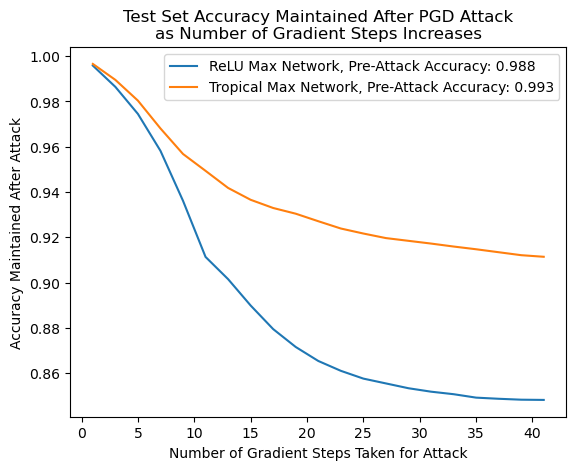

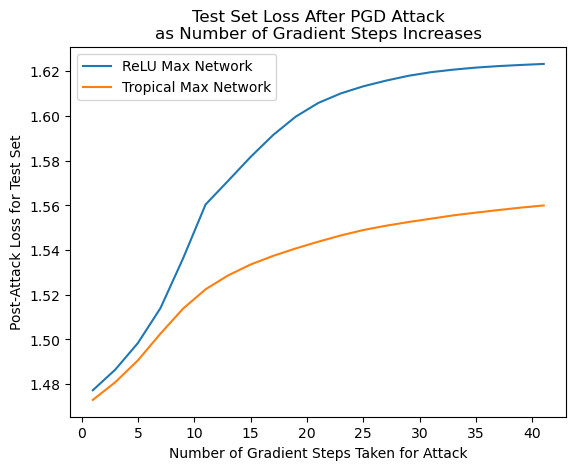

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
#MNIST_conv3layer_manyAvgTropLogits_attacks
#file_path='output_data/MNIST_conv3layer_tropLogits_attacks.csv'
file_path='output_data/MNIST_conv3layer_manyMaxTropLogits_attacks.csv'
file_path1='output_data/MNIST_conv3layer_manyMaxReluLogits_attacks.csv'
all_data = pd.read_csv(file_path)
trop_res = all_data[all_data['model_type']=='trop']
all_data = pd.read_csv(file_path1)
relu_res = all_data[all_data['model_type']=='relu']
plt.plot(relu_res['attack'], relu_res['maintained_correct_pred'], label=f"ReLU Max Network, Pre-Attack Accuracy: {round(relu_res['pre_acc'].iloc[0],3)}")
plt.plot(trop_res['attack'], trop_res['maintained_correct_pred'], label=f"Tropical Max Network, Pre-Attack Accuracy: {round(trop_res['pre_acc'].iloc[0],3)}")
plt.title('Test Set Accuracy Maintained After PGD Attack\nas Number of Gradient Steps Increases')
plt.xlabel('Number of Gradient Steps Taken for Attack')
plt.ylabel('Accuracy Maintained After Attack')
#plt.xlim((0,40))
plt.legend()
plt.show()

plt.plot(relu_res['attack'], relu_res['post_loss'], label=f'ReLU Max Network')
plt.plot(trop_res['attack'], trop_res['post_loss'], label=f'Tropical Max Network')
plt.title('Test Set Loss After PGD Attack\nas Number of Gradient Steps Increases')
plt.xlabel('Number of Gradient Steps Taken for Attack')
plt.ylabel('Post-Attack Loss for Test Set')
#plt.xlim((0,40))
plt.legend()
plt.show()

In [1]:
from custom_layers.tropical_layers import TropEmbedMaxMin, TropConv2D, TropConv2DMax, TropEmbedMaxMinLogits, SoftminLayer, ChangeSignLayer, SoftmaxLayer
from custom_layers.initializers import BimodalNormalInitializer
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Concatenate, MaxPooling2D, MaxPooling1D, AveragePooling1D, Activation, Flatten, Conv2D, Dropout, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Reshape, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers, Model, Input
from tensorflow import reduce_sum
import time

In [6]:
def trop_conv3layer_manyAverageLogits(x_train, 
                       y_train, 
                       num_epochs = 10,
                       batch_size = 32, 
                       verbose = 1,
                       p = 3,
                       training_loss = 'categorical_crossentropy',
                       num_first_filters = 32,
                       window_first_conv = (3,3),
                       initializer_w = initializers.RandomNormal(0, 0.1),
                       lam=0):
    start_time = time.time()
    num_classes = y_train.shape[1]
    inputs = Input(shape = x_train.shape[1:])
    first_half = Sequential([Conv2D(num_first_filters, window_first_conv, activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        Flatten(),
                        Dense(3, activation='relu', name='dense')])(inputs)
    class_work = [TropEmbedMaxMin(p, initializer_w=initializer_w, lam=lam)(first_half) for i in range(num_classes)]
    merge_layer = Concatenate(axis=-1)(class_work)              
    back_half = Sequential([Reshape((p*num_classes,1)),
                        AveragePooling1D(pool_size=p),
                        Flatten(),
                        SoftminLayer()])(merge_layer)
    model = Model(inputs=inputs, outputs=back_half)
    print(model.summary())
    model.compile(optimizer='adam', loss=training_loss, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=num_epochs,batch_size=batch_size, verbose=verbose)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"trop_conv3layer_manyAverageLogits model built. Elapsed time: {elapsed_time:.2f} seconds | {elapsed_time/60:.2f} minutes.")
    return model

In [1]:
from functions.load_data import  load_MNIST_data
x_train, x_test, y_train, y_test = load_MNIST_data(desired_classes=[i for i in range(10)])
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(y_train.shape)


(60000, 10)


In [8]:
trop_conv3layer_manyAverageLogits(x_train=x_train, y_train = y_train, batch_size=64, lam=1)

c:\Users\kurtp\anaconda3\envs\hpc_env\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, 3)            57475       ['input_3[0][0]']                
                                                                                                  
 trop_embed_max_min_20 (TropEmb  (None, 3)           12          ['sequential_4[0][0]']           
 edMaxMin)                                                                                        
                                                                                                  
 trop_embed_max_min_21 (TropEmb  (None, 3)           12          ['sequential_4[0][0]']     

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import models

# Assuming 'partial_model' and 'x_train' are available as mentioned earlier.

for i in range(10):
    # Get indices where the labels match the class_id
    class_data = x_train[(np.argmax(y_train, axis=1) == i)]
    # Extract the first 5 samples of the specified class from x_train
    inputs_class_0 = class_data[:100]

    # Get outputs from the specified layer for inputs of class 0
    layer_name = 'dense_1'  # Replace with the actual name of the desired layer
    partial_model = models.Model(inputs=trop_model.input, outputs=trop_model.get_layer(layer_name).output)
    outputs_class_0 = partial_model.predict(inputs_class_0)

    # Store outputs into a CSV file
    df_outputs = pd.DataFrame(outputs_class_0)
    df_outputs.to_csv(f'outputs_class_{i}.csv', index=False)

# Get layer weights from the last custom layer
last_custom_layer_weights = trop_model.get_layer('trop_embed_max_min_1').get_weights()  
# Replace 'last_custom_layer_name' with the actual name of your last custom layer
#print(last_custom_layer_weights[1])
# Convert weights into a format for CSV and save
weights_to_save = np.asarray(last_custom_layer_weights[0])
np.savetxt('last_custom_layer_weights.csv', weights_to_save, delimiter=',')
weights_to_save = np.asarray(last_custom_layer_weights[1])
np.savetxt('last_custom_layer_biases.csv', weights_to_save, delimiter=',')


In [2]:
from custom_layers.tropical_layers import TropEmbedMaxMin, TropConv2D, TropConv2DMax, TropEmbedMaxMinLogits, SoftminLayer, ChangeSignLayer, SoftmaxLayer
from custom_layers.initializers import BimodalNormalInitializer
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Concatenate, MaxPooling2D, MaxPooling1D, AveragePooling1D, Activation, Flatten, Conv2D, Dropout, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Reshape, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from tensorflow.keras.utils import plot_model
from tensorflow import reduce_sum
import time

def trop_conv3layer_logits(x_train, 
                       y_train, 
                       num_epochs = 10,
                       batch_size = 64, 
                       verbose = 1,
                       training_loss = 'categorical_crossentropy',
                       num_first_filters = 32,
                       window_first_conv = (3,3),
                       initializer_w = initializers.RandomNormal(0, 0.05),
                       lam=0):
    start_time = time.time()
    model = Sequential([Conv2D(num_first_filters, window_first_conv, activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        Flatten(),
                        Dense(3, activation='relu'),
                        TropEmbedMaxMinLogits(y_train.shape[1], initializer_w=initializer_w, lam=lam)])
    #model = tf.keras.Model(inputs=[input], outputs=[output])
    model.build(input_shape = x_train.shape)
    dot_img_file = 'model_1.png'
    plot_model(model, to_file=dot_img_file, show_shapes=True)
    #model.compile(optimizer='adam', loss=training_loss, metrics=['accuracy'])
    #model.fit(x_train, y_train, epochs=num_epochs,batch_size=batch_size, verbose=verbose)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"trop_conv3layer_logits model built. Elapsed time: {elapsed_time:.2f} seconds | {elapsed_time/60:.2f} minutes.")
    return model

model = trop_conv3layer_logits(x_train, y_train)



trop_conv3layer_logits model built. Elapsed time: 2.11 seconds | 0.04 minutes.
